In [10]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import data_manipulation as data
import results_plot as plot
import results_plot_modified as plot2

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%load_ext autoreload
%autoreload 2  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#hdu = fits.open('Tmap_IR.fits')
hdu = fits.open('Tmap_noIR.fits')
hdu.info()
cnt_data = (hdu[0].data).astype('float64') # REtr

Filename: Tmap_noIR.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  TMAP          1 PrimaryHDU      25   (8, 16)   float64   


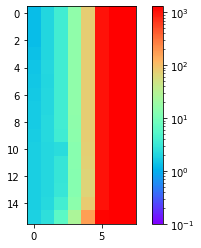

In [8]:
# Shows cnt files before masking and filtering 
fig, ax = plt.subplots()
plt.imshow(cnt_data, cmap='rainbow', norm=colors.LogNorm(vmin=.1, vmax=1300))
plt.colorbar()

In [12]:
xi_lin = data.linspace(0, 7, 1)
hden_lin = data.linspace(0, 15, 1)

In [15]:
prefix = 'Tmap_noIR.fits'

15


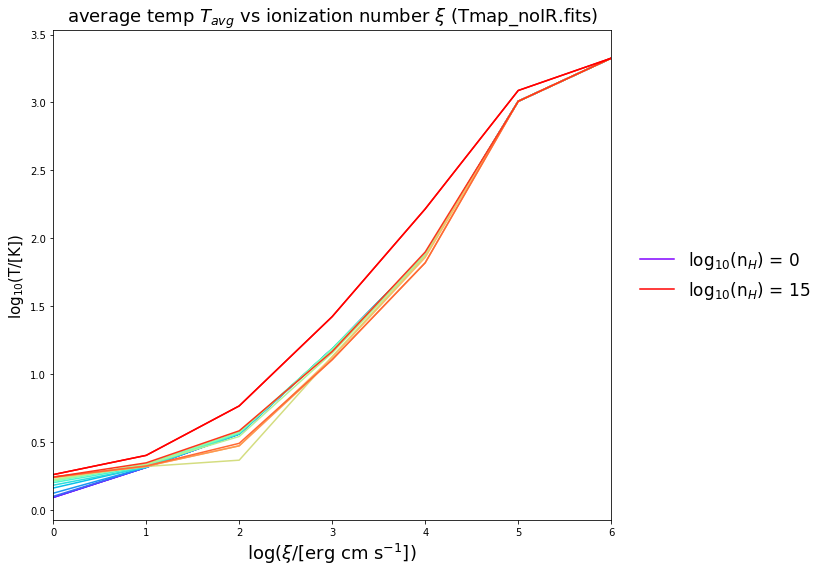

In [48]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title(
    "average temp $T_{avg} $ vs ionization number $\\xi$ (" + str(prefix) + ")",
    fontsize=18,
)
#plt.xlabel("ionization parameter $\\xi$", fontsize=18)
plt.xlabel('log($\\xi$/[erg cm s$^{-1}$])', fontsize=18)
plt.ylabel(r'log$_{10}$(T/[K])', fontsize=15)
#plt.xscale("log")
plt.xlim(0, 6)
#plt.yscale("log")

colors = plt.cm.rainbow(np.linspace(0, 1, len(hdu[0].data)))
#plt.plot(xi_lin,  np.array((hdu[0].data)[0]), color=colors[0], label="n_h=10^" + str(hden_lin[0]) + ' (all)')
for i in range(len(hden_lin)):
    row = np.array((hdu[0].data)[i])
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):  # == 1e-30 does NOT exist
        plt.plot(xi_lin, np.log10(row), color=colors[i])#, label="n_h=10^" + str(hden_lin[i]) + ' (all)')
    else:
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            xi_lin[0:end],
            np.log10(row)[0:end],
            color=colors[i],
            #label="n_h=10^" + str(hden_lin[i]) + ' (all)',
        )
    if i == 0:
        plt.plot(xi_lin, np.log10(row), color=colors[i], label=r'log$_{10}$(n$_H$) = 0')
    elif i == hden_lin[-1]:
        print(i)
        plt.plot(xi_lin, np.log10(row), color=colors[i], label=r'log$_{10}$(n$_H$) = 15')


#plt.plot(xi_lin, np.array((hdu[0].data)[-1]), color=colors[-1], label="n_h=10^" + str(hden_lin[-1]) + ' (all)')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize = 17, frameon=False)

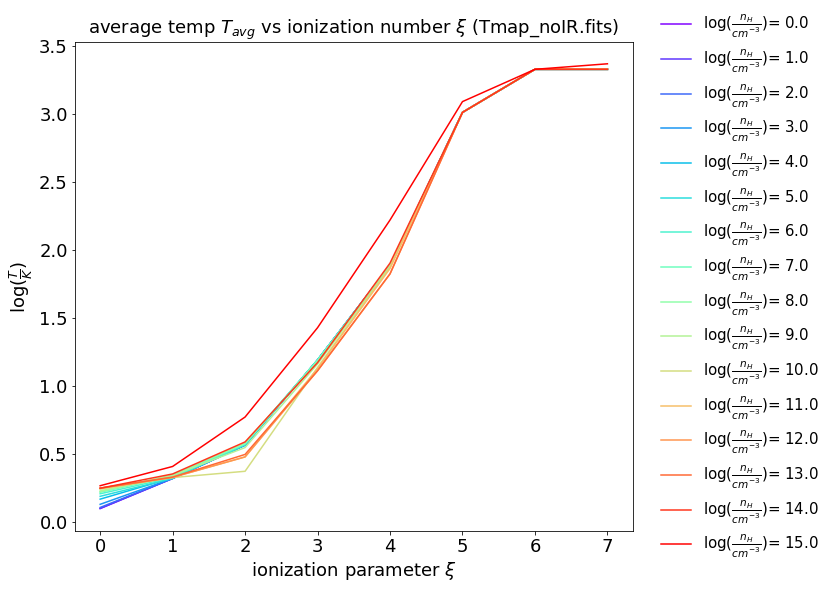

In [63]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title(
    "average temp $T_{avg} $ vs ionization number $\\xi$ (" + str(prefix) + ")",
    fontsize=18,
)
plt.xlabel("ionization parameter $\\xi$", fontsize=18)
#plt.ylabel("$T_{avg} [K]$", fontsize=13)
#plt.ylabel(r'log($\frac{T}{K}$)', fontsize=15)
plt.ylabel(r'log($\frac{T}{K}$)', fontsize=18)
#plt.xscale("log")
#plt.yscale("log")
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18)
colors = plt.cm.rainbow(np.linspace(0, 1, len(hdu[0].data)))
for i in range(len(hden_lin)):
    row = np.array((hdu[0].data)[i])
    (index,) = np.where(row != 1e-30)
    if len(index) == len(row):  # == 1e-30 does NOT exist
        plt.plot(xi_lin, np.log10(row), color=colors[i], label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin[i]))
    else:
        pass
        (i_1e30,) = np.where(row == 1e-30)
        end = i_1e30[0]
        plt.plot(
            xi[0:end],
            np.log10(row[0:end]),
            color=colors[i],
            label=r'log($\frac{n_{H}}{cm^{-3}}$)= ' + str(hden_lin[i]),
        )
    
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0,fontsize=15, frameon=False)

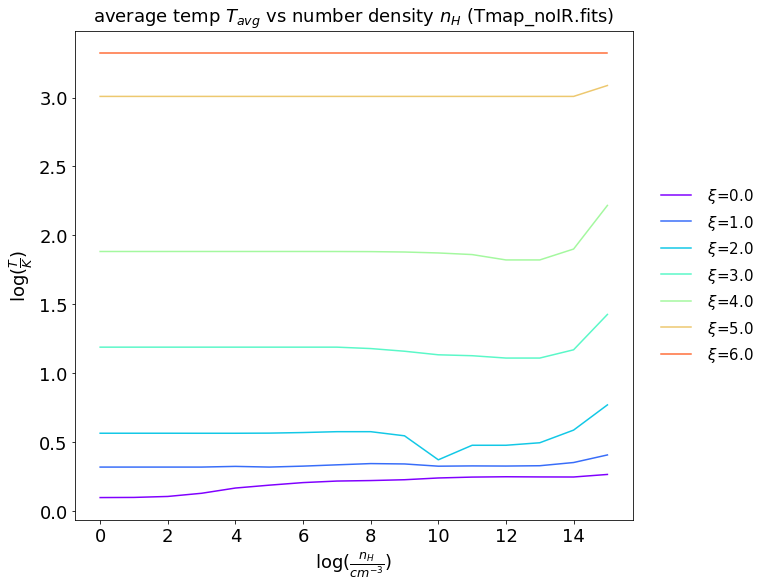

In [62]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title(
    "average temp $T_{avg} $ vs number density $n_H$ (" + str(prefix) + ")",
    fontsize=18,
)
plt.xlabel(r'log($\frac{n_{H}}{cm^{-3}}$)', fontsize=18)
plt.ylabel(r'log($\frac{T}{K}$)', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 
#plt.ylabel("$T_{avg} [K]$", fontsize=13)
#plt.ylabel("$T_{avg} [K]$", fontsize=15)
#plt.xscale("log")
#plt.yscale("log")
colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_n)))
for i in range(0, len(temp_n)-1):
    plt.plot(hden_lin, np.log10(temp_n[i]), color=colors[i], label=" $\\xi$=" + str(xi_lin[i]))
    
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=15, frameon=False)

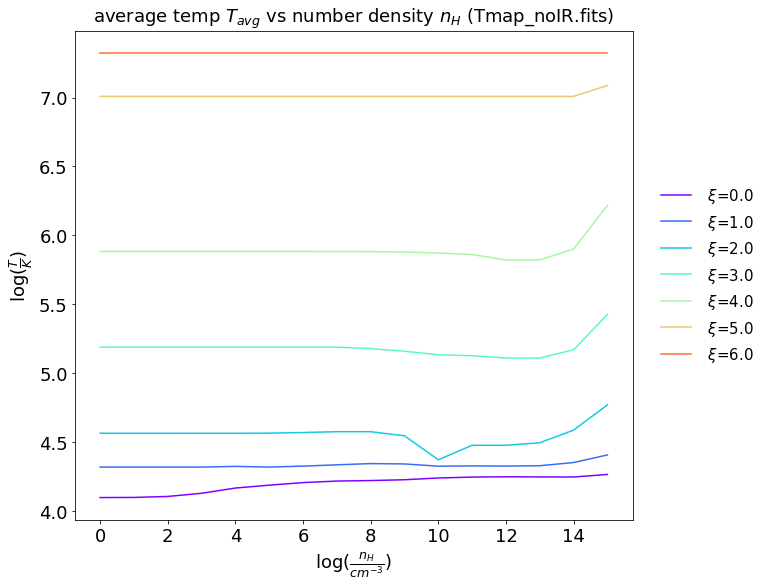

In [67]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.title(
    "average temp $T_{avg} $ vs number density $n_H$ (" + str(prefix) + ")",
    fontsize=18,
)
#plt.xlabel("number density $n_H$", fontsize=15)
plt.xlabel(r'log($\frac{n_{H}}{cm^{-3}}$)', fontsize=18)
plt.ylabel(r'log($\frac{T}{K}$)', fontsize=18)
ax.tick_params(axis='x', labelsize= 18) 
ax.tick_params(axis='y', labelsize= 18) 
#plt.ylabel("$T_{avg} [K]$", fontsize=13)
#plt.ylabel("$T_{avg} [K]$", fontsize=15)
#plt.xscale("log")
#plt.yscale("log")
colors = plt.cm.rainbow(np.linspace(0, 1, len(temp_n)))
for i in range(0, len(temp_n)-1):
    plt.plot(hden_lin, np.log10(np.array(temp_n[i])*1e4), color=colors[i], label=" $\\xi$=" + str(xi_lin[i]))
    
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=15, frameon=False)